In [11]:
import pandas as pd
import pickle,os, copy
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys


import re

from sklearn.cluster import DBSCAN


from nn_generalizability.nets import Nets
from nn_generalizability.utils import *
from nn_generalizability.postprocessing.postprocessing import *
from nn_generalizability.postprocessing.stats_plotting import *
from nn_generalizability.postprocessing.GA import *
from nn_generalizability.save_load import *

from nn_generalizability.postprocessing.sharpness_measures import *
from nn_generalizability.postprocessing.stats_plotting import *

from nn_generalizability.data_getters import *

%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = (13,9)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
meta = {"inner_range": (0, 1), 
                           "outer_range": (2, 3),
                           "train_num_points_inner": 500,
                           "train_num_points_outer": 500,
                           "test_num_points_inner": 100,
                           "test_num_points_outer": 100,
                            }

In [42]:
train_data, test_data = get_data("concentric_balls", vectorized=False, reduce_train_per=None, seed=0, meta=meta)

In [43]:
data= DataLoader(train_data, batch_size=len(train_data))

In [44]:
train_data[5]

(tensor([-0.6086,  0.1857]), tensor([0]))

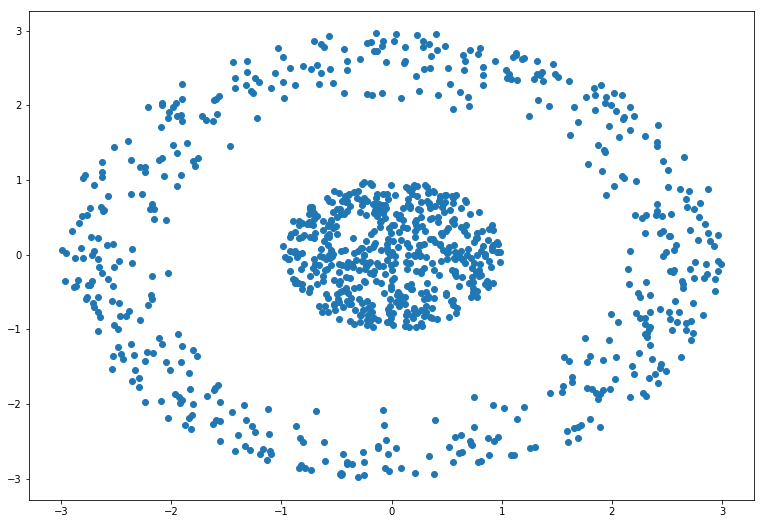

In [29]:
plt.scatter(inputs[:, 0], inputs[:, 1])

In [51]:
root_folder = os.environ["PATH_TO_GEN_FOLDER"]
data_name = "concentric_balls"
exp = "Aug04_15-15-27_Daniels-MacBook-Pro-4.local"
experiment_folder = os.path.join(root_folder, "experiments", data_name, exp)

In [52]:
# get all sorts of data
exp_dict = {}

def get_stuff(experiment_folder):
    stuff = {}

    stuff_to_try = ["tsne", "runs", "trace", "acc", "dist", "loss", "grad", "eig"]

    for singular_stuff in stuff_to_try:
        print("Getting {}.".format(singular_stuff))
        data, meta = load_cached_data(experiment_folder, singular_stuff)
        if data is None:
            print("Error: {} could not be found".format(singular_stuff))
        else:
            stuff[singular_stuff] = data
    
    stuff["configs"] = load_configs(experiment_folder)
    
    return stuff

exp_dict["stuff"] = get_stuff(experiment_folder)
exp_dict["models"] = get_all_models(experiment_folder, -1)
exp_dict["resampling_idxs"] = get_sample_idxs(experiment_folder)

Getting tsne.
Error: tsne could not be found
Getting runs.
Getting trace.
Getting acc.
Getting dist.
Error: dist could not be found
Getting loss.
Getting grad.
Error: grad could not be found
Getting eig.
Error: eig could not be found


In [53]:
stats_df = get_end_stats(exp_dict)


Error: No stats for 1596546936.2780101
YO
Error: No stats for 1596546936.501811
YO
Error: No stats for 1596546935.997018
YO


In [54]:
stats_df.sort_values(by="Acc Test Max", ascending=False)

,Acc Test Max,Acc Test Mean,Acc Test Min,Acc Train Max,Acc Train Mean,Acc Train Min,Gap Mean,Loss Test Max,Loss Test Mean,Loss Test Min,...,Loss Train Mean,Loss Train Min,Norm Max,Norm Mean,Norm Min,Trace Max,Trace Mean,Trace Mean Std,Trace Min,batch_train_size
1596546936.2780101,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000129,0.000129,0.000128,...,0.000092,0.000091,15.277394,15.223312,15.169230,0.104331,0.102883,0.085841,0.101435,256
1596546936.501811,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000129,0.000129,0.000128,...,0.000092,0.000091,15.277518,15.223465,15.169413,0.102270,0.096295,0.074059,0.090321,4096
1596546935.997018,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000129,0.000129,0.000128,...,0.000092,0.000090,15.275640,15.222081,15.168521,0.089092,0.082139,0.060161,0.075187,32
